In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Part 1 - Data Preparation and Pre-processing

In [2]:
df = pd.read_csv("data.csv")
df.head()

C:\Users\Conno\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
# Check for duplicates
df = df.drop('Id', axis=1)
df.duplicated().sum()

8607

In [4]:
# Remove Duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
# Remove columns that wont be used in analysis
df = df.drop(['Title', 'Requirement', 'FullDescription'], axis=1)
df.head()

,Company,Date,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType
0,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0,30,NaN
1,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN
2,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0,30,NaN
3,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN
4,Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0,30,NaN


In [6]:
# Check for null values
df.isnull().sum()

Company               11928
Date                      0
Location             113577
Area                 187763
Classification       113577
SubClassification    113577
LowestSalary              0
HighestSalary             0
JobType               15517
dtype: int64

In [7]:
# Remove entries with null values for critical columns
df = df.dropna(subset=['Date', 'LowestSalary', 'HighestSalary'])
df.isnull().sum()

Company               11928
Date                      0
Location             113577
Area                 187763
Classification       113577
SubClassification    113577
LowestSalary              0
HighestSalary             0
JobType               15517
dtype: int64

In [8]:
print(df.shape)
print(df.dtypes)

(309870, 9)
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


In [9]:
# Convert Date column to datetime
df['Date']= pd.to_datetime(df['Date'])
print(df.dtypes)

# Set index of the data to be date
df = df.set_index('Date')

Company                           object
Date                 datetime64[ns, UTC]
Location                          object
Area                              object
Classification                    object
SubClassification                 object
LowestSalary                       int64
HighestSalary                      int64
JobType                           object
dtype: object


In [10]:
# Add year and month columns
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Year_Month'] = df.index.to_period('M')

C:\Users\Conno\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [11]:
# Create extra column with average salary (combined lowest/highest)
df['AverageSalary'] = df[['LowestSalary','HighestSalary']].mean(axis=1)

# Create extra column with salary range (highest-lowest)
df['RangeSalary'] = df['HighestSalary'] - df['LowestSalary']

df.head()

,Company,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType,Year,Month,Day,Year_Month,AverageSalary,RangeSalary
Date,,,,,,,,,,,,,,
2018-10-07 00:00:00+00:00,Aldi Stores,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07 00:00:00+00:00,Aldi Stores,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07 00:00:00+00:00,LB Creative Pty Ltd,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07 00:00:00+00:00,Anaconda Group Pty Ltd,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,0,30,NaN,2018,10,7,2018-10,15.0,30
2018-10-07 00:00:00+00:00,Commonwealth Bank - Business & Private Banking,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,0,30,NaN,2018,10,7,2018-10,15.0,30


# Part 2 - Data Analysis and Interpretation

## 2.1 - Metadata

In [57]:
print("Average salary\n", df["AverageSalary"].describe())
print("\nLowest salary\n", df["LowestSalary"].describe())
print("\nHighest salary\n", df["HighestSalary"].describe())

Average salary
 count    309870.000000
mean         89.698403
std         108.555075
min          15.000000
25%          35.000000
50%          65.000000
75%         110.000000
max         599.500000
Name: AverageSalary, dtype: float64

Lowest salary
 count    309870.000000
mean         65.462517
std          50.995709
min           0.000000
25%          30.000000
50%          60.000000
75%         100.000000
max         200.000000
Name: LowestSalary, dtype: float64

Highest salary
 count    309870.000000
mean        113.934289
std         177.415993
min          30.000000
25%          40.000000
50%          70.000000
75%         120.000000
max         999.000000
Name: HighestSalary, dtype: float64


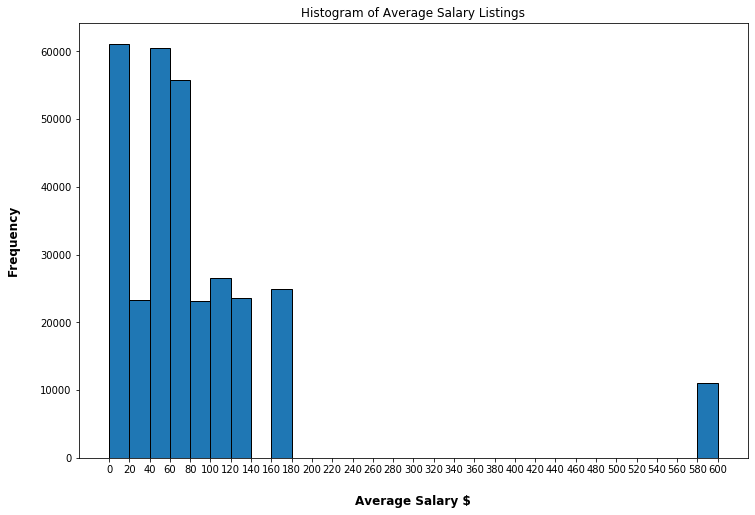

In [13]:
data = df['AverageSalary']
bins = np.arange(0, 601, step=20)
plt.figure(figsize=(12,8))
plt.hist(data, bins, edgecolor="k", alpha=1)
plt.xticks(bins)
plt.xlabel("Average Salary $", labelpad=20, weight='bold', size=12) 
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)
plt.title("Histogram of Average Salary Listings")
plt.show()

### Outliers
Exploritory data analysis to work out why there are a high amount of outlier jobs paying $580-600

In [14]:
outliers = df[df['AverageSalary'] == 599.5]
outliers

,Company,Location,Area,Classification,SubClassification,LowestSalary,HighestSalary,JobType,Year,Month,Day,Year_Month,AverageSalary,RangeSalary
Date,,,,,,,,,,,,,,
2018-10-05 00:00:00+00:00,AIMS International Executive Search,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-05 00:00:00+00:00,AIMS International Executive Search,Brisbane,CBD & Inner Suburbs,CEO & General Management,COO & MD,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-05 00:00:00+00:00,AIMS International Executive Search,Brisbane,CBD & Inner Suburbs,CEO & General Management,CEO,200,999,Full Time,2018,10,5,2018-10,599.5,799
2018-10-04 00:00:00+00:00,Hender Consulting,West Gippsland & Latrobe Valley,NaN,CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,4,2018-10,599.5,799
2018-10-04 00:00:00+00:00,Hender Consulting,Bairnsdale & Gippsland,NaN,CEO & General Management,General/Business Unit Manager,200,999,Full Time,2018,10,4,2018-10,599.5,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-13 00:00:00+00:00,Talenza,NaN,NaN,NaN,NaN,200,999,NaN,2019,3,13,2019-03,599.5,799
2019-03-13 00:00:00+00:00,Talent – Winner ‘Seek Large Recruitment Agency...,NaN,NaN,NaN,NaN,200,999,NaN,2019,3,13,2019-03,599.5,799
2019-03-12 00:00:00+00:00,Retail Career Consulting Pty Ltd,NaN,NaN,NaN,NaN,200,999,NaN,2019,3,12,2019-03,599.5,799


In [15]:
outliers["Classification"].value_counts()

Information & Communication Technology    3439
Healthcare & Medical                      1508
Construction                               501
Mining, Resources & Energy                 362
Government & Defence                       313
Engineering                                287
Banking & Financial Services               248
Accounting                                 246
CEO & General Management                   244
Legal                                      238
Sales                                      179
Consulting & Strategy                      129
Real Estate & Property                     108
Manufacturing, Transport & Logistics       108
Education & Training                       100
Human Resources & Recruitment               93
Marketing & Communications                  62
Design & Architecture                       55
Science & Technology                        36
Insurance & Superannuation                  30
Trades & Services                           28
Community Ser

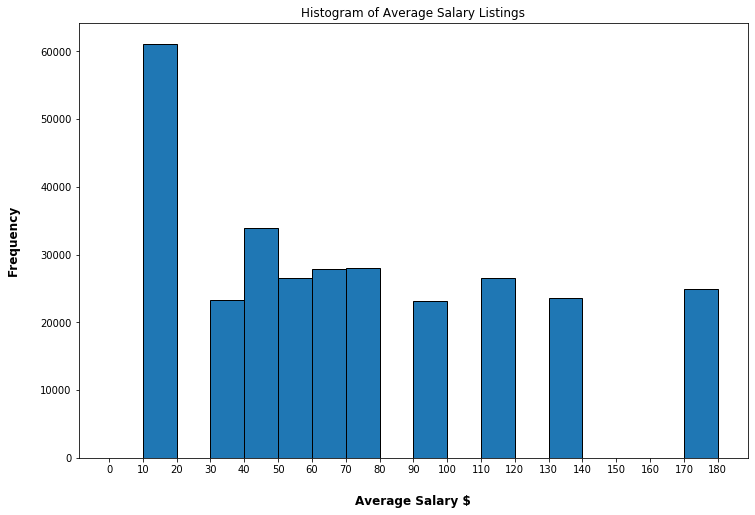

In [16]:
data = df['AverageSalary']
bins = np.arange(0, 181, step=10)
plt.figure(figsize=(12,8))
plt.hist(data, bins, edgecolor="k", alpha=1)
plt.xticks(bins)
plt.xlabel("Average Salary $", labelpad=20, weight='bold', size=12) 
plt.ylabel("Frequency", labelpad=20, weight='bold', size=12)
plt.title("Histogram of Average Salary Listings")
plt.show()

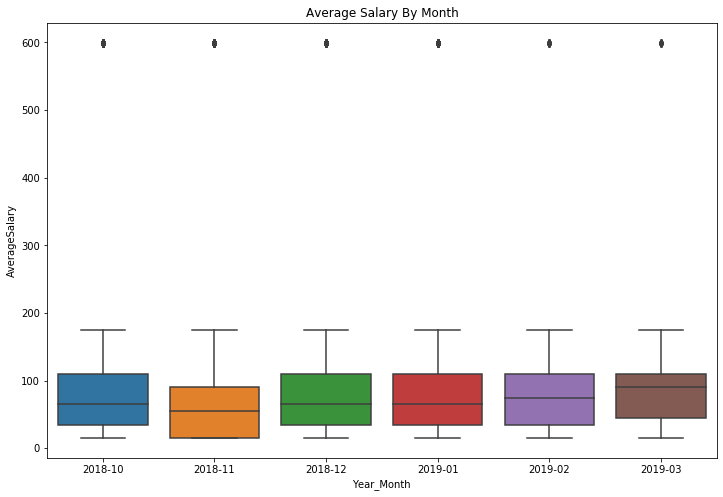

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='Year_Month', y='AverageSalary')
plt.title("Average Salary By Month")
plt.show()

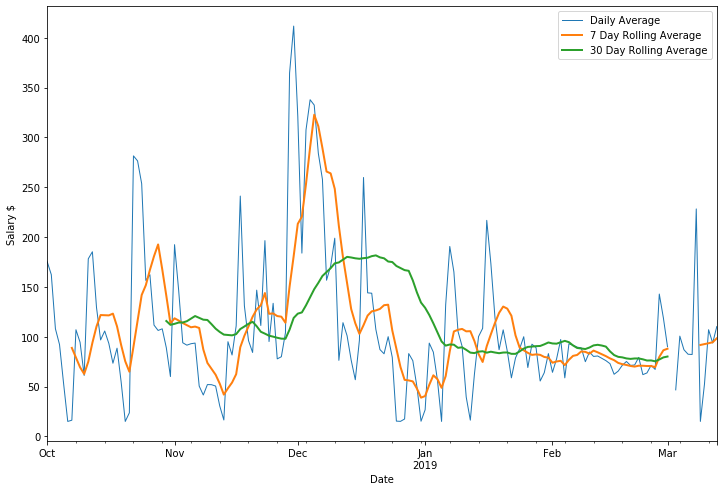

In [18]:
plt.figure(figsize=(12,8))
df_daily_avg = df['AverageSalary'].resample('D').mean()
df_weekly_avg = df_daily_avg.rolling(7).mean()
df_monthly_avg = df_daily_avg.rolling(30).mean()

df_daily_avg.plot(linewidth=1)
df_weekly_avg.plot(linewidth=2)
df_monthly_avg.plot(linewidth=2)
plt.legend(['Daily Average', '7 Day Rolling Average', '30 Day Rolling Average'])

plt.ylabel("Salary $")
plt.show()

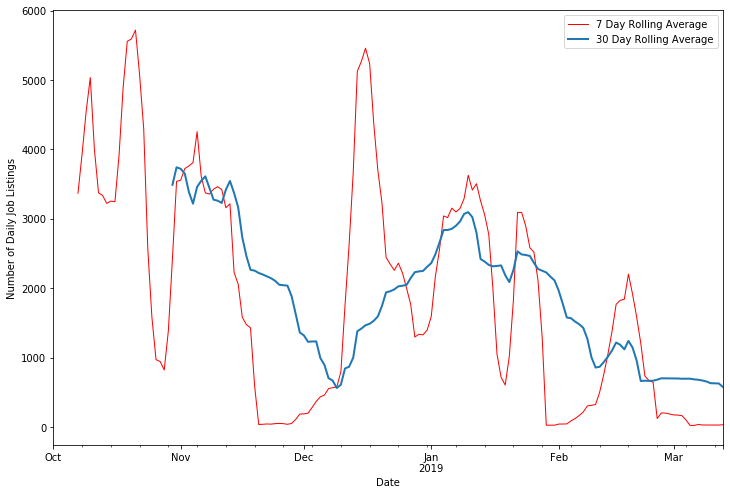

In [19]:
plt.figure(figsize=(12,8))
df_daily_avg = df['AverageSalary'].resample('D').count()
df_weekly_avg = df_daily_avg.rolling(7).mean()
df_monthly_avg = df_daily_avg.rolling(30).mean()

# df_daily_avg.plot(linewidth=1)
df_weekly_avg.plot(linewidth=1, c='red')
df_monthly_avg.plot(linewidth=2)
plt.legend(['7 Day Rolling Average', '30 Day Rolling Average'])

plt.ylabel("Number of Daily Job Listings")
plt.show()

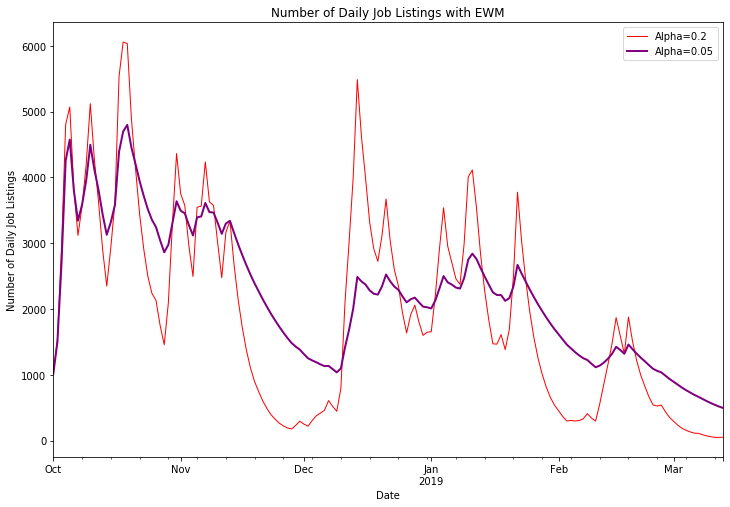

In [20]:
plt.figure(figsize=(12,8))
df_daily_avg = df['AverageSalary'].resample('D').count()
df_weekly_avg = df_daily_avg.ewm(alpha=0.2).mean()
df_monthly_avg = df_daily_avg.ewm(alpha=0.05).mean()

# df_daily_avg.plot(linewidth=1)
df_weekly_avg.plot(linewidth=1, c='red')
df_monthly_avg.plot(linewidth=2, c='purple')
plt.legend(['Alpha=0.2', 'Alpha=0.05'])
plt.title("Number of Daily Job Listings with EWM")

plt.ylabel("Number of Daily Job Listings")
plt.show()

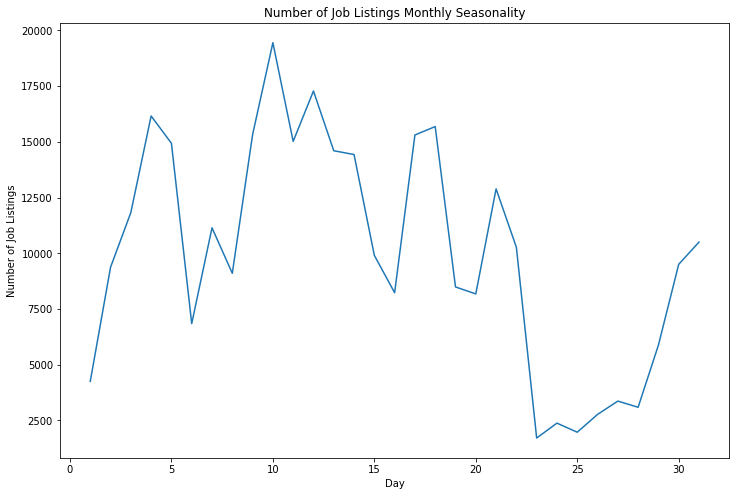

In [21]:
plt.figure(figsize=(12,8))
df.groupby("Day")['AverageSalary'].count().plot()
plt.ylabel("Number of Job Listings")
plt.title("Number of Job Listings Monthly Seasonality")
plt.show()

## 2.2 - Locations

In [22]:
# Group dataset by location and find mean lowest/highest salary + count (for total job listings)
df_location = df.groupby('Location').agg(['mean', 'count'])

Location
Sydney                                  60462
Melbourne                               46483
Brisbane                                21350
Perth                                   13161
Adelaide                                 6611
                                        ...  
Yorke Peninsula & Clare Valley             94
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: count, Length: 65, dtype: int64


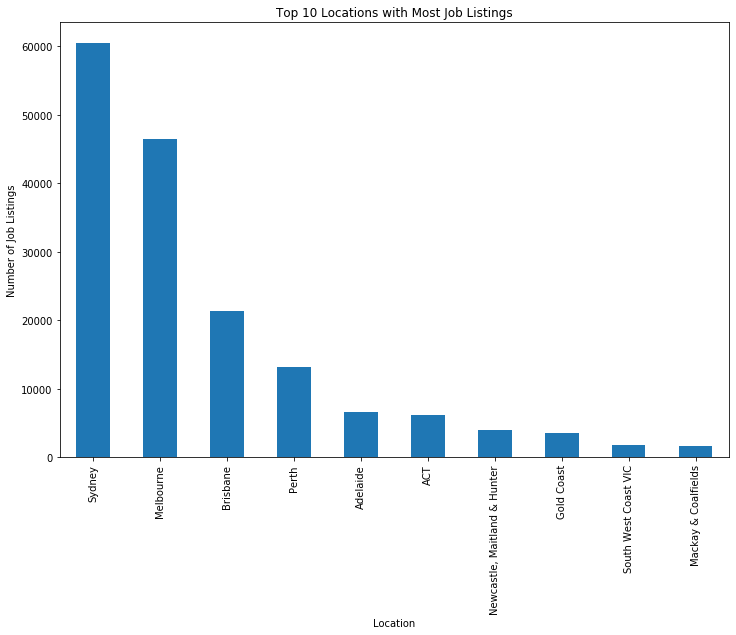

In [23]:
# Count total number of jobs at each location
print(df_location['AverageSalary']['count'].sort_values(ascending=False))
plt.figure(figsize=(12,8))
df_location['AverageSalary']['count'].sort_values(ascending=False).head(10).plot(kind="bar")
plt.ylabel("Number of Job Listings")
plt.title("Top 10 Locations with Most Job Listings")
plt.show()

In [24]:
# Average salary for each location
df_location['AverageSalary']['mean'].sort_values(ascending=False)

Location
ACT                                     142.680119
Port Macquarie & Mid North Coast        110.806624
Sydney                                  103.278687
Geraldton, Gascoyne & Midwest           101.887574
Western QLD                             101.743191
                                           ...    
Mornington Peninsula & Bass Coast        58.860354
Riverland & Murray Mallee                56.746575
Yarra Valley & High Country              56.557114
Adelaide Hills & Barossa                 55.069948
Fleurieu Peninsula & Kangaroo Island     50.546875
Name: mean, Length: 65, dtype: float64

In [25]:
df_PortHeadland = df.loc[df['Location'] == "Port Hedland, Karratha & Pilbara"]
df_Adelaide_Hills = df.loc[df['Location'] == "Fleurieu Peninsula & Kangaroo Island"]

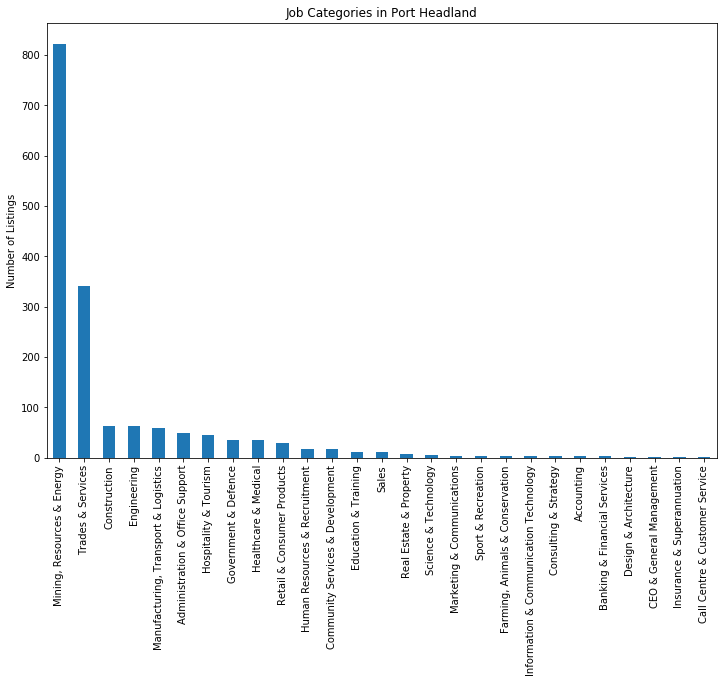

In [26]:
plt.figure(figsize=(12,8))
df_PortHeadland["Classification"].value_counts().plot(kind="bar")
plt.ylabel("Number of Listings")
plt.title("Job Categories in Port Headland")
plt.show()

In [27]:
df_PortHeadland["SubClassification"].value_counts()

Mining - Engineering & Maintenance    409
Mining - Operations                   216
Other                                  94
Fitters, Turners & Machinists          67
Automotive Trades                      54
                                     ... 
Building Services Engineering           1
Management - Agency                     1
Client & Sales Administration           1
Marketing Communications                1
Housing & Homelessness Services         1
Name: SubClassification, Length: 136, dtype: int64

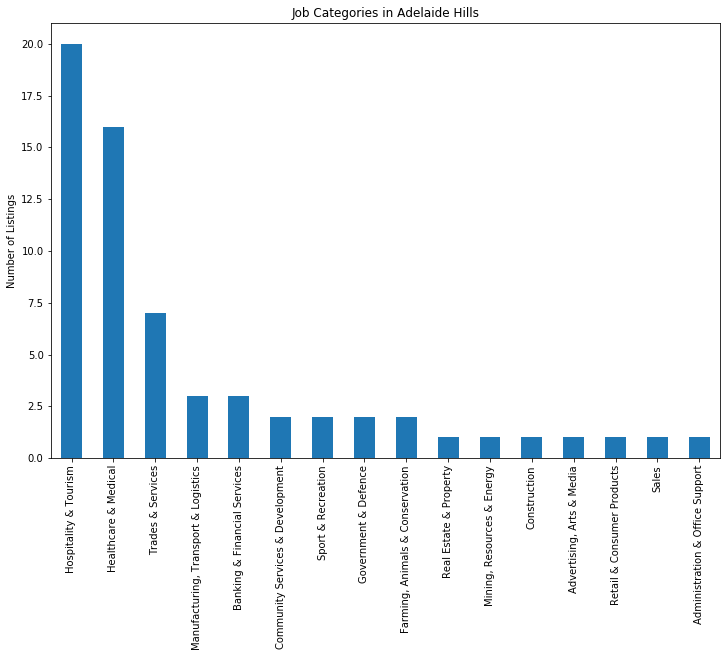

In [28]:
plt.figure(figsize=(12,8))
df_Adelaide_Hills["Classification"].value_counts().plot(kind="bar")
plt.ylabel("Number of Listings")
plt.title("Job Categories in Adelaide Hills")
plt.show()

In [29]:
df_Adelaide_Hills["SubClassification"].value_counts()

Chefs/Cooks                                     9
Nursing - Aged Care                             6
Other                                           6
Banking - Retail/Branch                         3
Bar & Beverage Staff                            3
Waiting Staff                                   2
Nursing - Management                            2
Physiotherapy, OT & Rehabilitation              2
Cleaning Services                               2
Management                                      2
Automotive Trades                               2
Travel Agents/Consultants                       1
Employment Services                             1
Fitness & Personal Training                     1
Coaching & Instruction                          1
Nursing - Community, Maternal & Child Health    1
Assembly & Process Work                         1
Surveying                                       1
Sales Representatives/Consultants               1
Agronomy & Farm Services                        1


# 2.3 - Sectors

In [30]:
df_classification = df.groupby('Classification').agg(['mean', 'count'])

Classification
Information & Communication Technology    22715
Trades & Services                         17929
Healthcare & Medical                      17023
Hospitality & Tourism                     15498
Manufacturing, Transport & Logistics      12339
Administration & Office Support            9991
Accounting                                 9348
Education & Training                       9151
Construction                               8349
Sales                                      8092
Retail & Consumer Products                 8010
Government & Defence                       7200
Engineering                                6436
Mining, Resources & Energy                 6269
Banking & Financial Services               4616
Community Services & Development           4464
Legal                                      4227
Human Resources & Recruitment              4121
Marketing & Communications                 3964
Call Centre & Customer Service             3951
Real Estate & Property   

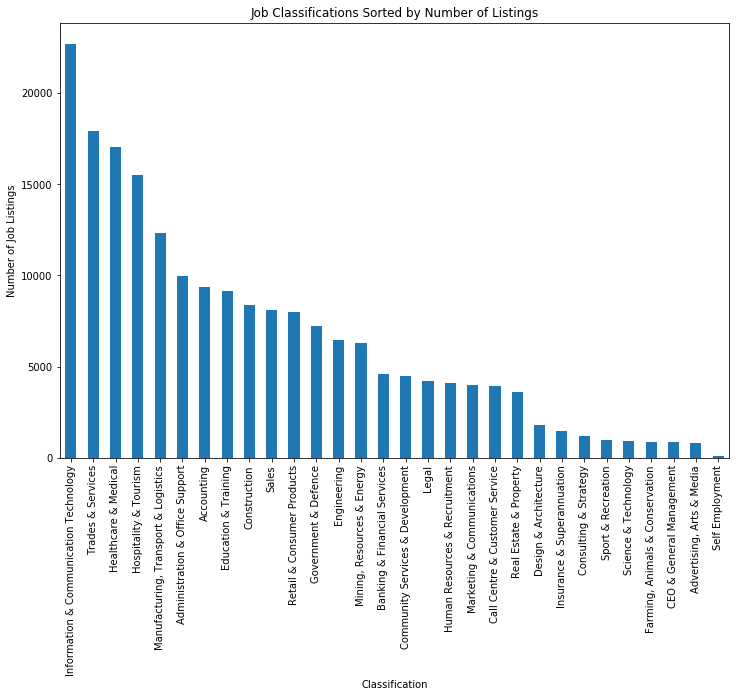

In [31]:
# Count total number of jobs in each sector
classification_count = df_classification['AverageSalary']['count'].sort_values(ascending=False)
print(classification_count)
plt.figure(figsize=(12,8))
classification_count.plot(kind="bar")
plt.ylabel("Number of Job Listings")
plt.title("Job Classifications Sorted by Number of Listings")
plt.show()

Classification
Accounting                                 87.603445
Administration & Office Support            48.608247
Advertising, Arts & Media                  69.095899
Banking & Financial Services              111.079073
CEO & General Management                  255.188095
Call Centre & Customer Service             48.563402
Community Services & Development           58.404346
Construction                              126.522877
Consulting & Strategy                     157.849206
Design & Architecture                      89.162977
Education & Training                       72.327068
Engineering                               121.043583
Farming, Animals & Conservation            57.811578
Government & Defence                      103.776181
Healthcare & Medical                      117.323680
Hospitality & Tourism                      40.228481
Human Resources & Recruitment              89.377214
Information & Communication Technology    182.465573
Insurance & Superannuation     

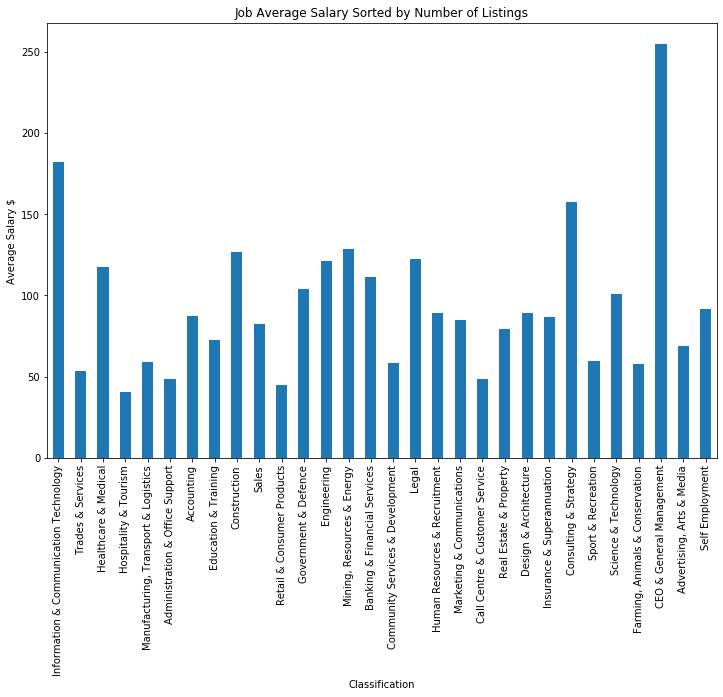

In [32]:
# Average salary for each sector
count_order = df_classification['AverageSalary']['count'].sort_values(ascending=False).iteritems()
print(df_classification['AverageSalary']['mean'])
classification_mean = df_classification['AverageSalary']['mean'][[name for name, count in count_order]]
plt.figure(figsize=(12,8))
classification_mean.plot(kind="bar")
plt.ylabel("Average Salary $")
plt.title("Job Average Salary Sorted by Number of Listings")
plt.show()

In [33]:
df_subclassification = df.groupby('SubClassification').agg(['mean', 'count'])

In [34]:
# Count total number of jobs in each subsector
df_subclassification['AverageSalary']['count'].sort_values(ascending=False)

SubClassification
Other                         11212
Management                     6221
Chefs/Cooks                    4593
Administrative Assistants      4562
Developers/Programmers         4194
                              ...  
Modelling & Simulation           14
Computer Operators               13
Air Force                        12
Chiropractic & Osteopathic       11
Army                              5
Name: count, Length: 338, dtype: int64

In [35]:
# Average salary for each subsector
df_subclassification['AverageSalary']['mean'].sort_values(ascending=False)

SubClassification
General Practitioners       411.490461
Medical Specialists         367.765814
COO & MD                    343.392157
CEO                         311.245399
Architects                  282.069715
                               ...    
Housekeeping                 37.813853
Pickers & Packers            37.722772
Kitchen & Sandwich Hands     35.564037
Bar & Beverage Staff         35.367505
Waiting Staff                34.685140
Name: mean, Length: 338, dtype: float64

In [36]:
df[df['Classification'] == 'CEO & General Management']['SubClassification'].value_counts()

General/Business Unit Manager    516
CEO                              163
Other                             86
COO & MD                          51
Board Appointments                24
Name: SubClassification, dtype: int64

In [37]:
df[df['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts()

Developers/Programmers                   4194
Business/Systems Analysts                2965
Programme & Project Management           2407
Architects                               1542
Engineering - Software                   1432
Help Desk & IT Support                   1372
Networks & Systems Administration        1192
Consultants                              1145
Other                                     996
Testing & Quality Assurance               827
Security                                  774
Management                                745
Engineering - Network                     551
Database Development & Administration     548
Web Development & Production              452
Sales - Pre & Post                        446
Product Management & Development          376
Telecommunications                        353
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          96
Computer Operators                

In [38]:
for name, count in classification_count.head(10).iteritems():
    print(name)

Information & Communication Technology
Trades & Services
Healthcare & Medical
Hospitality & Tourism
Manufacturing, Transport & Logistics
Administration & Office Support
Accounting
Education & Training
Construction
Sales


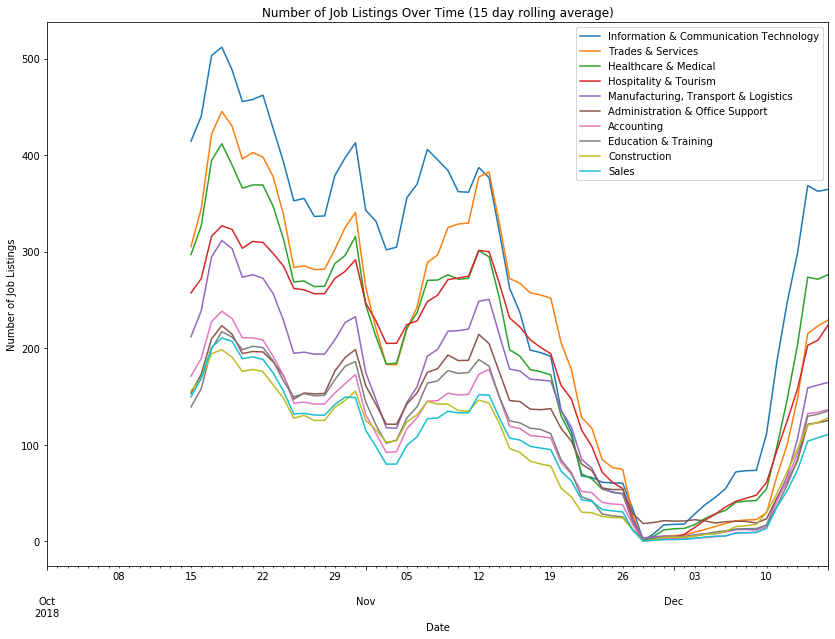

In [39]:
plt.figure(figsize=(14,10))

labels = []

for name, count in classification_count.head(10).iteritems():
    matching_class = df[df['Classification'] == name]
    labels.append(name)
    matching_class['AverageSalary'].resample('D').count().fillna(0).rolling(15).mean().plot()

plt.legend(labels)
plt.ylabel("Number of Job Listings")
plt.title("Number of Job Listings Over Time (15 day rolling average)")
plt.show()

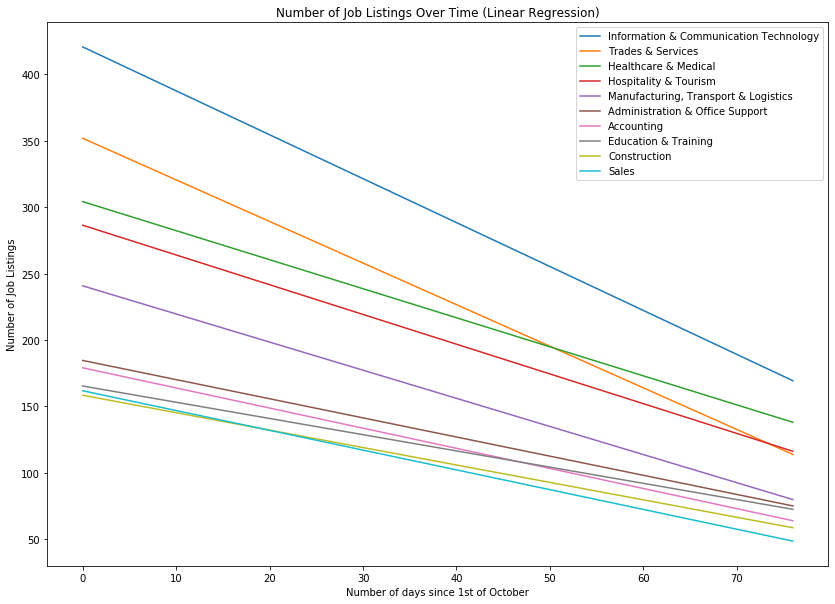

In [40]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(14,10))

labels = []

for name, count in classification_count.head(10).iteritems():
    matching_class = df[df['Classification'] == name]
    labels.append(name)
    graph = matching_class['AverageSalary'].resample('D').count()
    X = np.arange(len(graph.index.values)).reshape(-1, 1)  # values converts it into a numpy array
    Y = graph.fillna(0).values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.plot(X, Y_pred)
    

plt.legend(labels)
plt.xlabel("Number of days since 1st of October")
plt.ylabel("Number of Job Listings")
plt.title("Number of Job Listings Over Time (Linear Regression)")
plt.show()

# 2.4 - Export Interactive Data

In [58]:
# Export SECTORS
import json
set_classification = {"name": "sectors", "children": []}

l = 0
s = 0
    
for name, group in df.groupby('Classification').count()['AverageSalary'].iteritems():
    l += 1
    subclass = df[df['Classification'] == name]['SubClassification']
    children = []
    for i in subclass.unique():
        s += 1
        children.append({"name": i})
    set_classification['children'].append({"name": name, "children": children})
    
y = json.dumps(set_classification)
print(y)
print("Sectors", l)
print("SubSectors", s)

{"name": "sectors", "children": [{"name": "Accounting", "children": [{"name": "Bookkeeping & Small Practice Accounting"}, {"name": "Management Accounting & Budgeting"}, {"name": "Business Services & Corporate Advisory"}, {"name": "Financial Accounting & Reporting"}, {"name": "Audit - External"}, {"name": "Audit - Internal"}, {"name": "Financial Managers & Controllers"}, {"name": "Systems Accounting & IT Audit"}, {"name": "Taxation"}, {"name": "Payroll"}, {"name": "Accounts Receivable/Credit Control"}, {"name": "Accounts Officers/Clerks"}, {"name": "Assistant Accountants"}, {"name": "Analysis & Reporting"}, {"name": "Accounts Payable"}, {"name": "Company Secretaries"}, {"name": "Other"}, {"name": "Management"}, {"name": "Cost Accounting"}, {"name": "Insolvency & Corporate Recovery"}, {"name": "Compliance & Risk"}, {"name": "Strategy & Planning"}, {"name": "Inventory & Fixed Assets"}, {"name": "Treasury"}, {"name": "Forensic Accounting & Investigation"}]}, {"name": "Administration & Offi

In [59]:
# Export LOCATIONS

l = 0
s = 0

set_classification = {"name": "locations", "children": []}
    
for name, group in df.groupby('Location').count()['AverageSalary'].iteritems():
    l += 1
    subclass = df[df['Location'] == name]['Area'].dropna()
    children = []
    for i in subclass.unique():
        s += 1
        children.append({"name": i})
    set_classification['children'].append({"name": name, "children": children})
    
y = json.dumps(set_classification)
print(y)

print("Location", l)
print("SubArea", s)

{"name": "locations", "children": [{"name": "ACT", "children": []}, {"name": "Adelaide", "children": []}, {"name": "Adelaide Hills & Barossa", "children": []}, {"name": "Albany & Great Southern", "children": []}, {"name": "Albury Area", "children": []}, {"name": "Alice Springs & Central Australia", "children": []}, {"name": "Bairnsdale & Gippsland", "children": []}, {"name": "Ballarat & Central Highlands", "children": []}, {"name": "Bendigo, Goldfields & Macedon Ranges", "children": []}, {"name": "Blue Mountains & Central West", "children": []}, {"name": "Brisbane", "children": [{"name": "CBD & Inner Suburbs"}, {"name": "Western Suburbs & Ipswich"}, {"name": "Northern Suburbs"}, {"name": "Southern Suburbs & Logan"}, {"name": "Bayside & Eastern Suburbs"}]}, {"name": "Broome & Kimberley", "children": []}, {"name": "Bunbury & South West", "children": []}, {"name": "Bundaberg & Wide Bay Burnett", "children": []}, {"name": "Cairns & Far North", "children": []}, {"name": "Central & South Eas